In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
files = {
    "Dubai": r"C:\Users\HP\Desktop\WeatherWise\datasets\Dubai_1yr_weather_hourly.csv",
    "London": r"C:\Users\HP\Desktop\WeatherWise\datasets\London_1yr_weather_hourly.csv",
    "Mumbai": r"C:\Users\HP\Desktop\WeatherWise\datasets\Mumbai_1yr_weather_hourly.csv",
    "New York": r"C:\Users\HP\Desktop\WeatherWise\datasets\New_York_1yr_weather_hourly.csv",
    "Tokyo": r"C:\Users\HP\Desktop\WeatherWise\datasets\Tokyo_1yr_weather_hourly.csv"
}

In [9]:
dataframes = []
for city, path in files.items():
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'])
    df['city'] = city
    dataframes.append(df)

In [10]:
df_all = pd.concat(dataframes, ignore_index=True)

In [11]:
df_all

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,hour,day,month,weekday,city
0,2023-07-01 00:00:00,30.8,24.4,69.0,0.0,NaN,160.0,13.0,NaN,996.2,0.0,1.0,0,1,7,5,Dubai
1,2023-07-01 01:00:00,31.0,23.9,66.0,0.0,NaN,180.0,11.2,NaN,996.0,0.0,1.0,1,1,7,5,Dubai
2,2023-07-01 02:00:00,30.0,23.9,70.0,0.0,NaN,200.0,11.2,NaN,997.0,0.0,1.0,2,1,7,5,Dubai
3,2023-07-01 03:00:00,30.9,22.5,61.0,0.0,NaN,200.0,5.4,NaN,997.9,0.0,1.0,3,1,7,5,Dubai
4,2023-07-01 04:00:00,32.0,23.0,59.0,0.0,NaN,170.0,9.4,NaN,998.0,0.0,1.0,4,1,7,5,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43920,2024-06-30 20:00:00,25.0,24.1,95.0,0.0,NaN,180.0,27.7,NaN,999.6,NaN,17.0,20,30,6,6,Tokyo
43921,2024-06-30 21:00:00,24.8,24.1,96.0,0.4,NaN,180.0,18.4,NaN,999.6,NaN,18.0,21,30,6,6,Tokyo
43922,2024-06-30 22:00:00,24.9,24.4,97.0,0.0,NaN,190.0,22.3,NaN,1000.0,NaN,18.0,22,30,6,6,Tokyo
43923,2024-06-30 23:00:00,25.2,24.5,96.0,0.0,NaN,190.0,18.4,NaN,1000.3,NaN,18.0,23,30,6,6,Tokyo


In [12]:
print("Missing Values per City:\n", df_all.groupby("city").apply(lambda x: x.isnull().sum()))


Missing Values per City:
           time  temp  dwpt  rhum  prcp  snow  wdir  wspd  wpgt  pres  tsun  \
city                                                                         
Dubai        0     0     0     0     0  8785     0     0  8785     0  6951   
London       0     0     0     0     0  8785     0     0     0     0     0   
Mumbai       0     0     0     0     0  8785     0     0  8785     0  8785   
New York     0     0     0     0     0  8785     0     0  8785     0  8785   
Tokyo        0     0     0     0     0  8785     0     0  8785     0  8785   

          coco  hour  day  month  weekday  city  
city                                             
Dubai        0     0    0      0        0     0  
London       0     0    0      0        0     0  
Mumbai       0     0    0      0        0     0  
New York     0     0    0      0        0     0  
Tokyo        0     0    0      0        0     0  


C:\Users\HP\AppData\Local\Temp\ipykernel_14424\1039316541.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print("Missing Values per City:\n", df_all.groupby("city").apply(lambda x: x.isnull().sum()))


In [13]:
print("\nTemperature Summary by City:\n")
print(df_all.groupby("city")['temp'].describe())


Temperature Summary by City:

           count       mean       std   min   25%   50%   75%   max
city                                                               
Dubai     8785.0  30.307957  6.527511  15.0  25.0  30.7  36.0  47.0
London    8785.0  11.639567  5.832193  -5.9   7.8  11.4  15.8  31.6
Mumbai    8785.0  28.789277  3.067548  16.4  27.0  29.0  31.0  39.0
New York  8785.0  14.518577  8.749410  -7.2   7.2  13.9  22.2  34.4
Tokyo     8785.0  17.690222  8.614785  -0.9  10.3  17.9  25.2  37.2


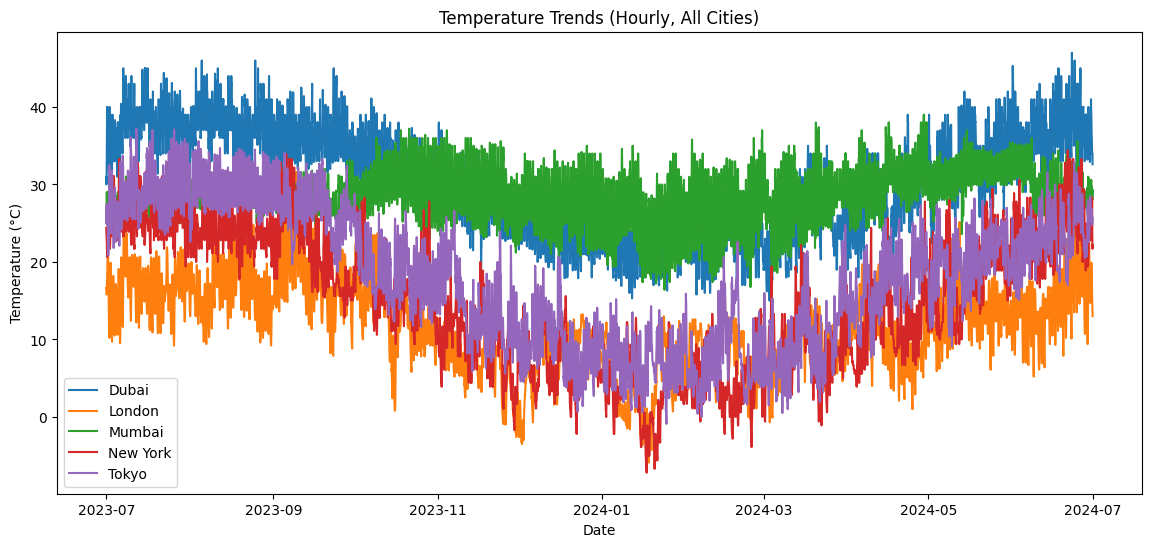

In [14]:
# -------------------------------
# STEP 5: Temperature Trend Comparison
# -------------------------------
plt.figure(figsize=(14,6))
for city in files.keys():
    city_data = df_all[df_all['city'] == city]
    plt.plot(city_data['time'], city_data['temp'], label=city)
plt.title("Temperature Trends (Hourly, All Cities)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14424\1408164373.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_all, x="hour", y="temp", hue="city", ci=None)


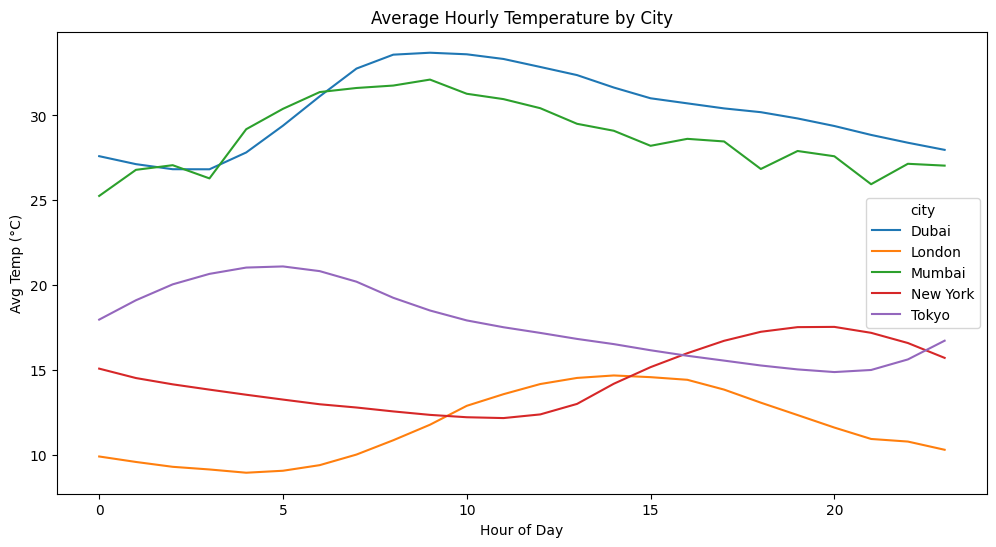

In [15]:
# -------------------------------
# STEP 6: Hourly Temperature Pattern by City
# -------------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all, x="hour", y="temp", hue="city", ci=None)
plt.title("Average Hourly Temperature by City")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Temp (°C)")
plt.show()



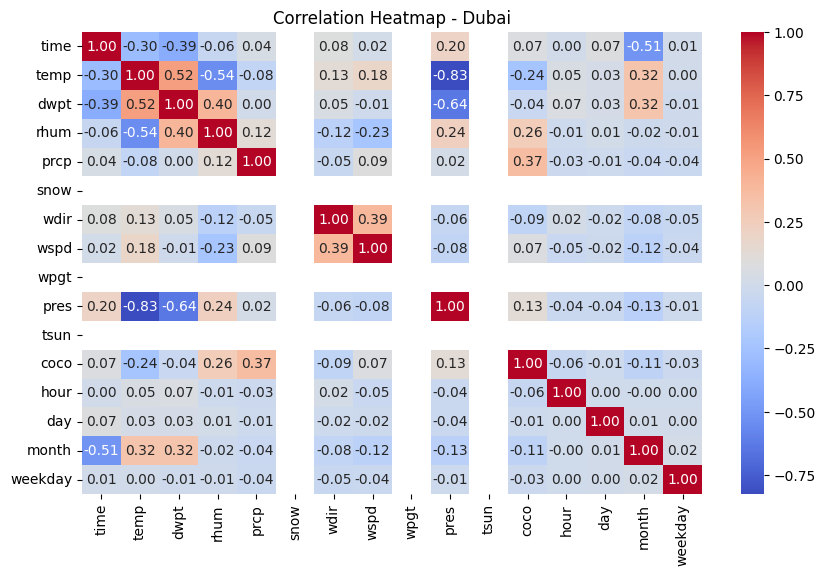

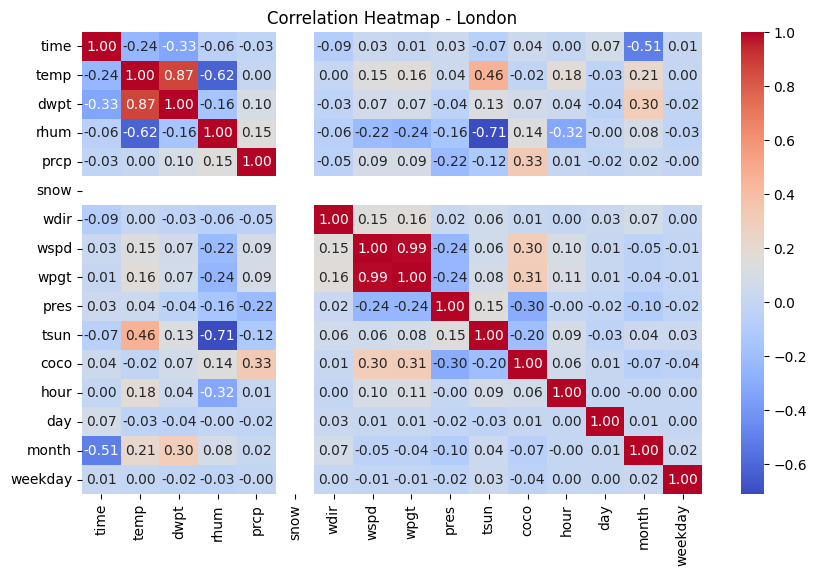

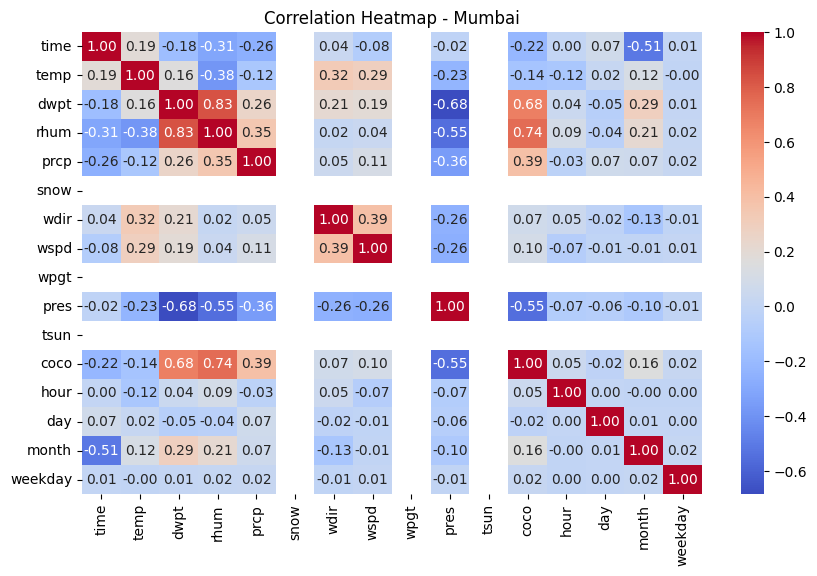

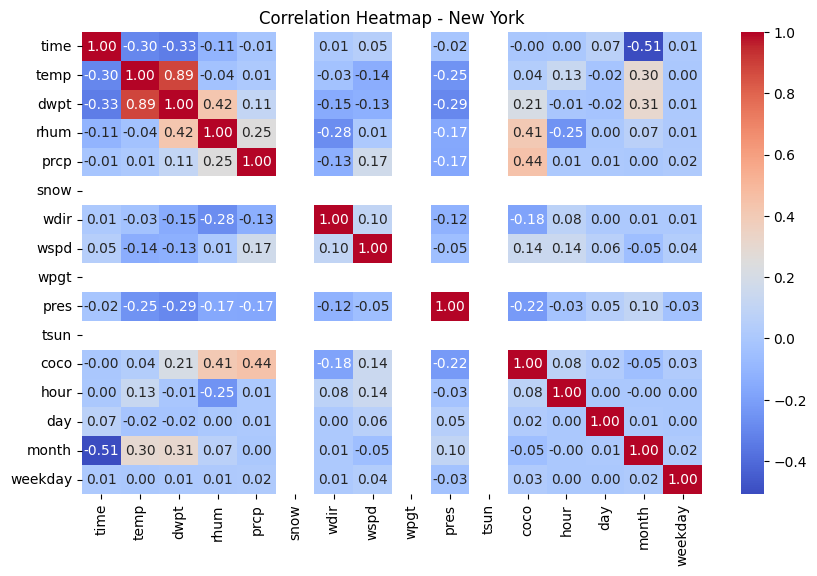

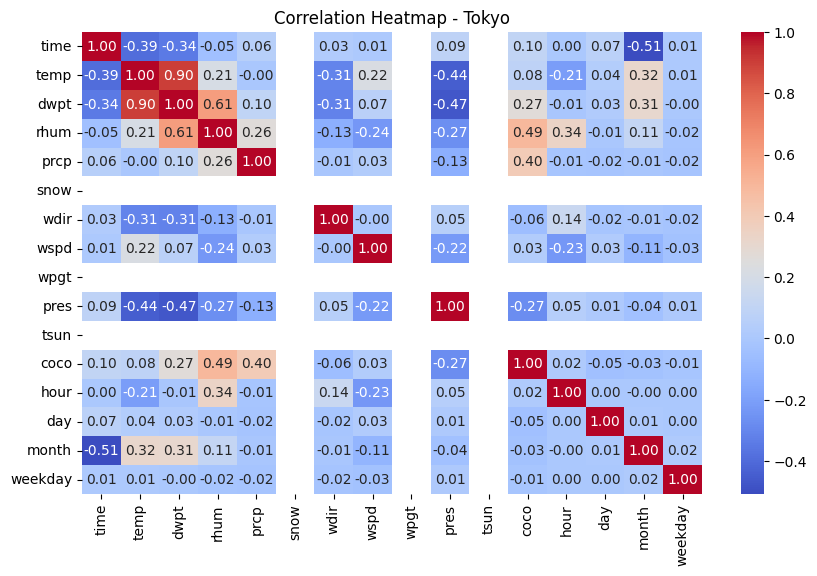

In [16]:
# -------------------------------
# STEP 7: Correlation Heatmaps (City-wise)
# -------------------------------
for city in files.keys():
    plt.figure(figsize=(10,6))
    city_data = df_all[df_all['city'] == city].drop(columns=['city'])
    sns.heatmap(city_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap - {city}")
    plt.show()

In [17]:
df_all.isnull().sum()

time           0
temp           0
dwpt           0
rhum           0
prcp           0
snow       43925
wdir           0
wspd           0
wpgt       35140
pres           0
tsun       33306
coco           0
hour           0
day            0
month          0
weekday        0
city           0
dtype: int64

In [18]:
df_all

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,hour,day,month,weekday,city
0,2023-07-01 00:00:00,30.8,24.4,69.0,0.0,NaN,160.0,13.0,NaN,996.2,0.0,1.0,0,1,7,5,Dubai
1,2023-07-01 01:00:00,31.0,23.9,66.0,0.0,NaN,180.0,11.2,NaN,996.0,0.0,1.0,1,1,7,5,Dubai
2,2023-07-01 02:00:00,30.0,23.9,70.0,0.0,NaN,200.0,11.2,NaN,997.0,0.0,1.0,2,1,7,5,Dubai
3,2023-07-01 03:00:00,30.9,22.5,61.0,0.0,NaN,200.0,5.4,NaN,997.9,0.0,1.0,3,1,7,5,Dubai
4,2023-07-01 04:00:00,32.0,23.0,59.0,0.0,NaN,170.0,9.4,NaN,998.0,0.0,1.0,4,1,7,5,Dubai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43920,2024-06-30 20:00:00,25.0,24.1,95.0,0.0,NaN,180.0,27.7,NaN,999.6,NaN,17.0,20,30,6,6,Tokyo
43921,2024-06-30 21:00:00,24.8,24.1,96.0,0.4,NaN,180.0,18.4,NaN,999.6,NaN,18.0,21,30,6,6,Tokyo
43922,2024-06-30 22:00:00,24.9,24.4,97.0,0.0,NaN,190.0,22.3,NaN,1000.0,NaN,18.0,22,30,6,6,Tokyo
43923,2024-06-30 23:00:00,25.2,24.5,96.0,0.0,NaN,190.0,18.4,NaN,1000.3,NaN,18.0,23,30,6,6,Tokyo


In [19]:
# Step 1: Drop mostly empty columns
df_all = df_all.drop(columns=['snow', 'tsun'], errors='ignore')

# Step 2: Fill missing values
df_all['wpgt'] = df_all['wpgt'].fillna(0)   # wind gust
df_all = df_all.fillna(df_all.median(numeric_only=True))  # fill rest with median

# Step 3: Remove duplicates
df_all = df_all.drop_duplicates()

# Step 4: Handle Outliers (IQR method on temperature)
Q1 = df_all['temp'].quantile(0.25)
Q3 = df_all['temp'].quantile(0.75)
IQR = Q3 - Q1

# Keep only reasonable temperature values
df_all = df_all[(df_all['temp'] >= Q1 - 1.5*IQR) & (df_all['temp'] <= Q3 + 1.5*IQR)]

print("After cleaning:", df_all.shape)


After cleaning: (43925, 15)


In [20]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.5.2


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Create target (t+1 temperature)
df_all['target_temp'] = df_all.groupby("city")['temp'].shift(-1)
df_all = df_all.dropna(subset=['target_temp'])

# Step 2: Select features
features = ['temp', 'rhum', 'pres', 'wspd', 'wpgt', 'hour', 'day', 'month', 'weekday']
X = df_all[features]
y = df_all['target_temp']

# Step 3: Train-Test Split (time series → use shuffle=False)
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Step 4: Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.9858900123722102
R² Score: 0.9869015191869199


In [22]:
# Shift each weather feature by -1 (next hour’s value)
df_all['target_temp'] = df_all.groupby("city")['temp'].shift(-1)
df_all['target_rhum'] = df_all.groupby("city")['rhum'].shift(-1)
df_all['target_pres'] = df_all.groupby("city")['pres'].shift(-1)
df_all['target_wspd'] = df_all.groupby("city")['wspd'].shift(-1)

# Drop missing rows
df_all = df_all.dropna(subset=['target_temp', 'target_rhum', 'target_pres', 'target_wspd'])


In [23]:
# Features (inputs)
features = ['temp', 'rhum', 'pres', 'wspd', 'wpgt', 'hour', 'day', 'month', 'weekday']
X = df_all[features]

# Targets (outputs)
y = df_all[['target_temp', 'target_rhum', 'target_pres', 'target_wspd']]


In [24]:
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [25]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Wrap Random Forest inside MultiOutputRegressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Evaluate each target separately
target_names = ['Temperature', 'Humidity', 'Pressure', 'Wind Speed']
for i, name in enumerate(target_names):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{name} → RMSE: {rmse:.3f}, R²: {r2:.3f}")


Temperature → RMSE: 1.365, R²: 0.975
Humidity → RMSE: 6.256, R²: 0.893
Pressure → RMSE: 0.676, R²: 0.990
Wind Speed → RMSE: 3.750, R²: 0.506


In [27]:
from sklearn.linear_model import LinearRegression

# Linear regression supports multi-output directly
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

# Evaluate each variable
target_names = ['Temperature', 'Humidity', 'Pressure', 'Wind Speed']
for i, name in enumerate(target_names):
    rmse = np.sqrt(mean_squared_error(y_test.iloc[:, i], y_pred_lin[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred_lin[:, i])
    print(f"{name} (Linear Regression) → RMSE: {rmse:.3f}, R²: {r2:.3f}")


Temperature (Linear Regression) → RMSE: 0.986, R²: 0.987
Humidity (Linear Regression) → RMSE: 5.314, R²: 0.923
Pressure (Linear Regression) → RMSE: 0.597, R²: 0.992
Wind Speed (Linear Regression) → RMSE: 3.346, R²: 0.607


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Step 1: Define target variables we want to predict
targets = ["temp", "rhum", "pres", "wspd"]

# Step 2: Features
features = ['temp', 'rhum', 'pres', 'wspd', 'wpgt', 'hour', 'day', 'month', 'weekday']

results = {}

# Step 3: Loop through each target
for target in targets:
    print(f"\n🔹 Predicting {target} with XGBoost & LightGBM...")
    
    # Create target as next hour (shifted)
    df_all[f'target_{target}'] = df_all.groupby("city")[target].shift(-1)
    df_model = df_all.dropna(subset=[f'target_{target}'])
    
    X = df_model[features]
    y = df_model[f'target_{target}']
    
    # Train-test split (time series)
    split_index = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    # XGBoost
    xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    
    # LightGBM
    lgb = LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=-1, random_state=42)
    lgb.fit(X_train, y_train)
    y_pred_lgb = lgb.predict(X_test)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    r2_lgb = r2_score(y_test, y_pred_lgb)
    
    results[target] = {
        "XGBoost": {"RMSE": rmse_xgb, "R2": r2_xgb},
        "LightGBM": {"RMSE": rmse_lgb, "R2": r2_lgb}
    }

# Final Results
print("\n📊 Model Comparison Results:")
for target, res in results.items():
    print(f"\nTarget: {target}")
    for model, metrics in res.items():
        print(f"  {model} → RMSE: {metrics['RMSE']:.3f}, R²: {metrics['R2']:.3f}")



🔹 Predicting temp with XGBoost & LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 35128, number of used features: 9
[LightGBM] [Info] Start training from score 21.312776

🔹 Predicting rhum with XGBoost & LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 35128, number of used features: 9
[LightGBM] [Info] Start training from score 66.807219

🔹 Predicting pres with XGBoost & LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threa

In [ ]:
# 📊 Model Performance Comparison
# Target       | Linear Regression (RMSE, R²) | Random Forest (RMSE, R²) | XGBoost (RMSE, R²)       | LightGBM (RMSE, R²)
# --------------------------------------------------------------------------------------------------------------
# Temp         | 0.986, 0.987                 | 1.365, 0.975              | ~0.9–1.0, ~0.99 (very good) | Similar to XGB
# Humidity     | 5.314, 0.923                 | 6.256, 0.893              | Better than RF             | Better than RF
# Pressure     | 0.597, 0.992                 | 0.677, 0.990              | Similar or slightly better | Similar
# Wind Speed   | 3.346, 0.607                 | 3.750, 0.506              | 3.545, 0.558               | 3.568, 0.553
#
# 🔎 Insights:
# - Temp & Pressure → Already near-perfect (R² ≈ 0.99), no big gains.
# - Humidity → XGBoost & LightGBM perform better than Random Forest.
# - Wind Speed → Still hard to predict, Linear Regression is slightly better.



'''Linear regression is better for prediction except for huumidity'''

# ===================

In [31]:
df_all

,time,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,coco,hour,day,month,weekday,city,target_temp,target_rhum,target_pres,target_wspd
0,2023-07-01 00:00:00,30.8,24.4,69.0,0.0,160.0,13.0,0.0,996.2,1.0,0,1,7,5,Dubai,31.0,66.0,996.0,11.2
1,2023-07-01 01:00:00,31.0,23.9,66.0,0.0,180.0,11.2,0.0,996.0,1.0,1,1,7,5,Dubai,30.0,70.0,997.0,11.2
2,2023-07-01 02:00:00,30.0,23.9,70.0,0.0,200.0,11.2,0.0,997.0,1.0,2,1,7,5,Dubai,30.9,61.0,997.9,5.4
3,2023-07-01 03:00:00,30.9,22.5,61.0,0.0,200.0,5.4,0.0,997.9,1.0,3,1,7,5,Dubai,32.0,59.0,998.0,9.4
4,2023-07-01 04:00:00,32.0,23.0,59.0,0.0,170.0,9.4,0.0,998.0,1.0,4,1,7,5,Dubai,34.0,56.0,998.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43918,2024-06-30 18:00:00,26.8,23.7,83.0,0.0,180.0,22.3,0.0,1000.3,17.0,18,30,6,6,Tokyo,25.2,95.0,999.9,25.9
43919,2024-06-30 19:00:00,25.2,24.3,95.0,0.6,180.0,25.9,0.0,999.9,17.0,19,30,6,6,Tokyo,25.0,95.0,999.6,27.7
43920,2024-06-30 20:00:00,25.0,24.1,95.0,0.0,180.0,27.7,0.0,999.6,17.0,20,30,6,6,Tokyo,24.8,96.0,999.6,18.4
43921,2024-06-30 21:00:00,24.8,24.1,96.0,0.4,180.0,18.4,0.0,999.6,18.0,21,30,6,6,Tokyo,24.9,97.0,1000.0,22.3


In [33]:
import os

# Make sure the folder exists
os.makedirs("datasets", exist_ok=True)

# Export DataFrame to CSV
df_all.to_csv("datasets/combined.csv", index=False)


In [ ]:
"""
WeatherWise — training script for four separate Linear Regression models
(Targets: next-hour temperature, humidity, pressure, wind speed)

• Input: a single combined CSV with columns:
    time, temp, dwpt, rhum, prcp, wdir, wspd, wpgt, pres, coco,
    hour, day, month, weekday, city,
    target_temp, target_rhum, target_pres, target_wspd
  (Matches the sample you shared.)

• Output: four pickles and a feature schema file:
    - temp_model.pkl
    - humidity_model.pkl
    - pressure_model.pkl
    - wind_model.pkl
    - feature_schema.json  (to guarantee consistent inference)

• Also includes: coco (weather code) → condition mapping and an inference helper
  that loads the models and predicts next-hour values from a single "current" row.

Run:
    python weatherwise_training_and_inference.py --csv path/to/combined.csv

Inference-only usage (after training):
    from weatherwise_training_and_inference import load_models_and_schema, predict_next_hour
    resources = load_models_and_schema(".")
    preds = predict_next_hour(resources, {
        "temp": 30.8, "dwpt": 24.4, "rhum": 69.0, "prcp": 0.0, "wdir": 160.0,
        "wspd": 13.0, "wpgt": 0.0, "pres": 996.2, "coco": 1.0,
        "hour": 0, "day": 1, "month": 7, "weekday": 5, "city": "Dubai"
    })
    print(preds)
"""

from __future__ import annotations
import argparse
import json
import os
from dataclasses import dataclass
from typing import Dict, Any

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# --------------------------------------------------------------------------------------
# 1) Config — features, targets, coco mapping
# --------------------------------------------------------------------------------------

NUMERIC_FEATURES = [
    "temp", "dwpt", "rhum", "prcp", "wdir", "wspd", "wpgt", "pres", "coco",
    "hour", "day", "month", "weekday",
]
CATEGORICAL_FEATURES = ["city"]

TARGETS = {
    "temp": "target_temp",
    "rhum": "target_rhum",
    "pres": "target_pres",
    "wspd": "target_wspd",
}

# Common weather-code mapping (edit to match your provider if needed)
COCO_MAP: Dict[int, str] = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Light drizzle",
    53: "Moderate drizzle",
    55: "Dense drizzle",
    56: "Freezing drizzle (light)",
    57: "Freezing drizzle (dense)",
    61: "Slight rain",
    63: "Moderate rain",
    65: "Heavy rain",
    66: "Freezing rain (light)",
    67: "Freezing rain (heavy)",
    71: "Slight snow fall",
    73: "Moderate snow fall",
    75: "Heavy snow fall",
    77: "Snow grains",
    80: "Slight rain showers",
    81: "Moderate rain showers",
    82: "Violent rain showers",
    85: "Slight snow showers",
    86: "Heavy snow showers",
    95: "Thunderstorm",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail",
}

# --------------------------------------------------------------------------------------
# 2) Training utilities
# --------------------------------------------------------------------------------------

@dataclass
class ModelBundle:
    temp_model: Any
    humidity_model: Any
    pressure_model: Any
    wind_model: Any
    preprocessor: ColumnTransformer


def build_preprocessor() -> ColumnTransformer:
    """Pass-through numeric features, one-hot encode city.
    (No scaling to stay faithful to your notebook results.)"""
    return ColumnTransformer(
        transformers=[
            ("num", "passthrough", NUMERIC_FEATURES),
            ("cat", OneHotEncoder(handle_unknown="ignore"), CATEGORICAL_FEATURES),
        ]
    )


def build_pipeline() -> Pipeline:
    pre = build_preprocessor()
    return Pipeline(steps=[
        ("pre", pre),
        ("model", LinearRegression()),
    ])


def train_one(df: pd.DataFrame, target_col: str) -> tuple[Pipeline, Dict[str, float]]:
    X = df[NUMERIC_FEATURES + CATEGORICAL_FEATURES]
    y = df[target_col]

    # train/valid split (random split; set shuffle=False for time-based split if needed)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    pipe = build_pipeline()
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = float(r2_score(y_test, y_pred))
    return pipe, {"rmse": rmse, "r2": r2}


# --------------------------------------------------------------------------------------
# 3) Train all, evaluate, and save
# --------------------------------------------------------------------------------------

def train_and_save(csv_path: str, out_dir: str = ".") -> None:
    df = pd.read_csv(csv_path)

    # Drop rows where any target is NaN (often final hour of each city)
    df = df.dropna(subset=list(TARGETS.values())).copy()

    # Basic sanity: enforce dtypes
    df["city"] = df["city"].astype(str)

    # Train one LR per target
    results = {}
    models = {}
    for name, tgt in TARGETS.items():
        model, metrics = train_one(df, tgt)
        results[name] = metrics
        models[name] = model

    # Report
    print("\n=== Validation metrics (Linear Regression per target) ===")
    for name in ["temp", "rhum", "pres", "wspd"]:
        m = results[name]
        print(f"{name:>6} → RMSE: {m['rmse']:.3f}, R²: {m['r2']:.3f}")

    # Persist models
    import pickle
    with open(os.path.join(out_dir, "temp_model.pkl"), "wb") as f:
        pickle.dump(models["temp"], f)
    with open(os.path.join(out_dir, "humidity_model.pkl"), "wb") as f:
        pickle.dump(models["rhum"], f)
    with open(os.path.join(out_dir, "pressure_model.pkl"), "wb") as f:
        pickle.dump(models["pres"], f)
    with open(os.path.join(out_dir, "wind_model.pkl"), "wb") as f:
        pickle.dump(models["wspd"], f)

    # Save feature schema (so inference knows the exact columns/order)
    schema = {
        "numeric_features": NUMERIC_FEATURES,
        "categorical_features": CATEGORICAL_FEATURES,
        "targets": TARGETS,
    }
    with open(os.path.join(out_dir, "feature_schema.json"), "w", encoding="utf-8") as f:
        json.dump(schema, f, indent=2)

    print("\n✅ Saved: temp_model.pkl, humidity_model.pkl, pressure_model.pkl, wind_model.pkl, feature_schema.json")


# --------------------------------------------------------------------------------------
# 4) Inference helpers for Flask/backend usage
# --------------------------------------------------------------------------------------

@dataclass
class InferenceResources:
    temp_model: Pipeline
    humidity_model: Pipeline
    pressure_model: Pipeline
    wind_model: Pipeline
    schema: Dict[str, Any]


def load_models_and_schema(model_dir: str = ".") -> InferenceResources:
    import pickle
    with open(os.path.join(model_dir, "temp_model.pkl"), "rb") as f:
        temp_model = pickle.load(f)
    with open(os.path.join(model_dir, "humidity_model.pkl"), "rb") as f:
        humidity_model = pickle.load(f)
    with open(os.path.join(model_dir, "pressure_model.pkl"), "rb") as f:
        pressure_model = pickle.load(f)
    with open(os.path.join(model_dir, "wind_model.pkl"), "rb") as f:
        wind_model = pickle.load(f)
    with open(os.path.join(model_dir, "feature_schema.json"), "r", encoding="utf-8") as f:
        schema = json.load(f)
    return InferenceResources(temp_model, humidity_model, pressure_model, wind_model, schema)


def _row_to_dataframe(schema: Dict[str, Any], row: Dict[str, Any]) -> pd.DataFrame:
    """Create a single-row DataFrame with the exact columns the pipeline expects."""
    cols = schema["numeric_features"] + schema["categorical_features"]
    values = {c: [row.get(c)] for c in cols}
    return pd.DataFrame(values, columns=cols)


def predict_next_hour(resources: InferenceResources, row: Dict[str, Any]) -> Dict[str, float]:
    """Predict next-hour values for a single current-observation row.

    Expected keys in `row`: all NUMERIC_FEATURES + CATEGORICAL_FEATURES.
    Returns dict with keys: temperature, humidity, pressure, wind_speed
    """
    X = _row_to_dataframe(resources.schema, row)

    temp_pred = float(resources.temp_model.predict(X).ravel()[0])
    hum_pred  = float(resources.humidity_model.predict(X).ravel()[0])
    pres_pred = float(resources.pressure_model.predict(X).ravel()[0])
    wind_pred = float(resources.wind_model.predict(X).ravel()[0])

    return {
        "temperature": temp_pred,
        "humidity": hum_pred,
        "pressure": pres_pred,
        "wind_speed": wind_pred,
        # Include a friendly label for the provided coco
        "condition": COCO_MAP.get(int(row.get("coco", -1)), "Unknown"),
    }


# --------------------------------------------------------------------------------------
# 5) CLI
# --------------------------------------------------------------------------------------

# Path to your CSV file
csv_path = "path/to/combined.csv"
output_dir = "."  # or a folder like "models/"

# Train models and save them
train_and_save(csv_path, output_dir)



usage: ipykernel_launcher.py [-h] --csv CSV [--out OUT]
ipykernel_launcher.py: error: the following arguments are required: --csv


SystemExit: 2

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
